# YAP471 Project - Zeynep Meriç Aşık - 201410026

In [2]:
!pip install -r requirements.txt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime

In [4]:
np.random.seed(12345)

In [5]:
dataset = pd.read_csv("AAPL.csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.959292,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.969144,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.977632,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.978390,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.049628,2227450400
...,...,...,...,...,...,...,...
4684,2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43675600
4685,2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600
4686,2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900
4687,2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900


## Data Visualization

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4689 non-null   object 
 1   Open       4689 non-null   float64
 2   High       4689 non-null   float64
 3   Low        4689 non-null   float64
 4   Close      4689 non-null   float64
 5   Adj Close  4689 non-null   float64
 6   Volume     4689 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 256.6+ KB


In [7]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4.689000e+03
mean,42.428267,42.898492,41.974049,42.454191,40.847949,4.100052e+08
std,50.481736,51.073497,49.933151,50.526211,50.538148,3.995805e+08
min,1.139107,1.159107,1.117857,1.130179,0.959292,3.145820e+07
25%,6.705000,6.780000,6.605357,6.686071,5.675114,1.124640e+08
50%,23.067499,23.149643,22.814644,23.020000,20.176666,2.687216e+08
75%,47.907501,48.220001,47.552502,47.862499,45.989861,5.923456e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,3.372970e+09


(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([4.99331509e+01, 1.99790719e+07, 3.99580938e+07, 5.99371157e+07,
        7.99161377e+07, 9.98951596e+07, 1.19874182e+08, 1.39853203e+08,
        1.59832225e+08, 1.79811247e+08, 1.99790269e+08, 2.19769291e+08,
        2.39748313e+08, 2.59727335e+08, 2.79706357e+08, 2.99685379e+08,
        3.19664401e+08, 3.39643423e+08, 3.59622445e+08, 3.79601467e+08,
        3.99580489e+08]),
 <BarContainer object of 20 artists>)

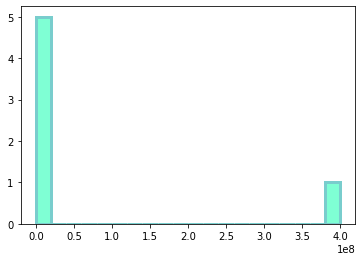

In [9]:
std = pd.Series.sort_values(dataset.describe().loc["std"])
plt.hist(std , color="#7FFFD4" , ec="#79CDCD" , lw=3 , bins=20)

(array([1463.,  758.,  700.,  330.,  314.,  167.,   62.,   63.,   39.,
          25.,    9.,   58.,  100.,  105.,  131.,  134.,   83.,   84.,
          37.,   27.]),
 array([  1.117857 ,  10.8259641,  20.5340712,  30.2421783,  39.9502854,
         49.6583925,  59.3664996,  69.0746067,  78.7827138,  88.4908209,
         98.198928 , 107.9070351, 117.6151422, 127.3232493, 137.0313564,
        146.7394635, 156.4475706, 166.1556777, 175.8637848, 185.5718919,
        195.279999 ]),
 <BarContainer object of 20 artists>)

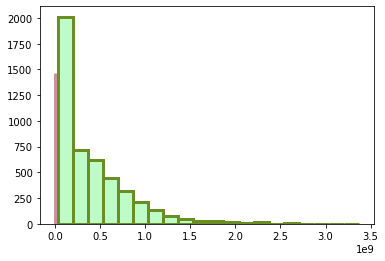

In [10]:
plt.hist(dataset["Volume"] , color="#BDFCC9" , ec="#6B8E23" , lw=3 , bins=20)
plt.hist(dataset["Low"] , color="#FFC0CB" , ec="#CD919E" , lw=3 , bins=20)

In [11]:
dataset.shape

(4689, 7)

In [12]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.959292,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.969144,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.977632,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.978390,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.049628,2227450400
...,...,...,...,...,...,...,...
4684,2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43675600
4685,2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600
4686,2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900
4687,2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900


In [13]:
dataset = dataset[["Date","Adj Close"]]
dataset

,Date,Adj Close
0,2005-01-03,0.959292
1,2005-01-04,0.969144
2,2005-01-05,0.977632
3,2005-01-06,0.978390
4,2005-01-07,1.049628
...,...,...
4684,2023-08-14,179.460007
4685,2023-08-15,177.449997
4686,2023-08-16,176.570007
4687,2023-08-17,174.000000


In [14]:
def str_to_datetime(s):
    split = s.split("-")
    y, m, d = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=y,month=m,day=d)

dataset["Date"] = dataset["Date"].apply(str_to_datetime)
dataset["Date"]

C:\Users\Asus\AppData\Local\Temp\ipykernel_19440\3893542193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Date"] = dataset["Date"].apply(str_to_datetime)


0      2005-01-03
1      2005-01-04
2      2005-01-05
3      2005-01-06
4      2005-01-07
          ...    
4684   2023-08-14
4685   2023-08-15
4686   2023-08-16
4687   2023-08-17
4688   2023-08-18
Name: Date, Length: 4689, dtype: datetime64[ns]

In [15]:
dataset.set_index('Date', inplace=True)
dataset

,Adj Close
Date,
2005-01-03,0.959292
2005-01-04,0.969144
2005-01-05,0.977632
2005-01-06,0.978390
2005-01-07,1.049628
...,...
2023-08-14,179.460007
2023-08-15,177.449997
2023-08-16,176.570007


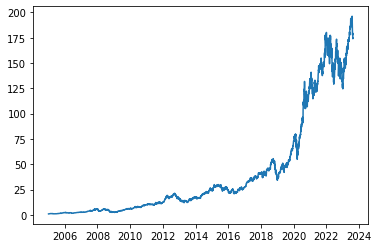

In [16]:
plt.plot(dataset.index, dataset["Adj Close"])

In [17]:
def windows(df,n):
    windowed_data = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_data[f'Target-{i}'] = df['Adj Close'].shift(i)
    windowed_data['Target'] = df['Adj Close']
    return windowed_data.dropna()
new_data = windows(dataset,30)
new_data

windowed_data = pd.DataFrame()
for i in range(30, 0, -1):
    windowed_data[f'Target-{i}'] = dataset['Adj Close'].shift(i)
windowed_data['Target'] = dataset['Adj Close']

new data = windowed_data.dropna()
new_data

,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,Target-21,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-15,0.959292,0.969144,0.977632,0.978390,1.049628,1.045232,0.978541,0.992183,1.057965,1.064027,...,1.206958,1.179373,1.194984,1.196500,1.226208,1.193468,1.187709,1.230907,1.282744,1.340037
2005-02-16,0.969144,0.977632,0.978390,1.049628,1.045232,0.978541,0.992183,1.057965,1.064027,1.070848,...,1.179373,1.194984,1.196500,1.226208,1.193468,1.187709,1.230907,1.282744,1.340037,1.366107
2005-02-17,0.977632,0.978390,1.049628,1.045232,0.978541,0.992183,1.057965,1.064027,1.070848,1.059177,...,1.194984,1.196500,1.226208,1.193468,1.187709,1.230907,1.282744,1.340037,1.366107,1.330944
2005-02-18,0.978390,1.049628,1.045232,0.978541,0.992183,1.057965,1.064027,1.070848,1.059177,1.067967,...,1.196500,1.226208,1.193468,1.187709,1.230907,1.282744,1.340037,1.366107,1.330944,1.315787
2005-02-22,1.049628,1.045232,0.978541,0.992183,1.057965,1.064027,1.070848,1.059177,1.067967,1.068423,...,1.226208,1.193468,1.187709,1.230907,1.282744,1.340037,1.366107,1.330944,1.315787,1.292748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-14,193.708420,192.200470,191.071976,191.551331,190.422852,188.355652,187.826370,189.514084,190.283035,190.432846,...,195.346207,192.320297,190.912201,181.744583,178.608810,179.557526,177.949707,177.729996,177.789993,179.460007
2023-08-15,192.200470,191.071976,191.551331,190.422852,188.355652,187.826370,189.514084,190.283035,190.432846,193.728394,...,192.320297,190.912201,181.744583,178.608810,179.557526,177.949707,177.729996,177.789993,179.460007,177.449997
2023-08-16,191.071976,191.551331,190.422852,188.355652,187.826370,189.514084,190.283035,190.432846,193.728394,193.468735,...,190.912201,181.744583,178.608810,179.557526,177.949707,177.729996,177.789993,179.460007,177.449997,176.570007


In [18]:
arr = new_data.to_numpy()
dates = new_data.index
X = arr[:, 0:-1]
X = X.reshape(len(dates), X.shape[1],1)
X = X.astype(np.float32)
y = arr[:,-1]
y = y.astype(np.float32)

In [19]:
dates

DatetimeIndex(['2005-02-15', '2005-02-16', '2005-02-17', '2005-02-18',
               '2005-02-22', '2005-02-23', '2005-02-24', '2005-02-25',
               '2005-02-28', '2005-03-01',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', name='Date', length=4659, freq=None)

In [20]:
X

array([[[  0.959292],
        [  0.969144],
        [  0.977632],
        ...,
        [  1.187709],
        [  1.230907],
        [  1.282744]],

       [[  0.969144],
        [  0.977632],
        [  0.97839 ],
        ...,
        [  1.230907],
        [  1.282744],
        [  1.340037]],

       [[  0.977632],
        [  0.97839 ],
        [  1.049628],
        ...,
        [  1.282744],
        [  1.340037],
        [  1.366107]],

       ...,

       [[191.07198 ],
        [191.55133 ],
        [190.42285 ],
        ...,
        [177.79    ],
        [179.46    ],
        [177.45    ]],

       [[191.55133 ],
        [190.42285 ],
        [188.35565 ],
        ...,
        [179.46    ],
        [177.45    ],
        [176.57    ]],

       [[190.42285 ],
        [188.35565 ],
        [187.82637 ],
        ...,
        [177.45    ],
        [176.57    ],
        [174.      ]]], dtype=float32)

In [21]:
y

array([  1.340037,   1.366107,   1.330944, ..., 176.57    , 174.      ,
       174.49    ], dtype=float32)

In [22]:
dates.shape, X.shape, y.shape

((4659,), (4659, 30, 1), (4659,))

In [23]:
train_date, X_train, y_train = dates[:int(len(dates)*0.8)], X[:int(len(dates)*0.8)], y[:int(len(dates)*0.8)]
test_date, X_test, y_test = dates[int(len(dates)*0.8):], X[int(len(dates)*0.8):], y[int(len(dates)*0.8):]

In [24]:
train_date.shape, test_date.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3727,), (932,), (3727, 30, 1), (3727,), (932, 30, 1), (932,))

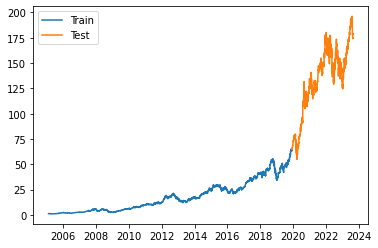

In [25]:
plt.plot(train_date, y_train)
plt.plot(test_date, y_test)
plt.legend(["Train","Test"])

## Models

### RNN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([
    layers.Input((30, 1)),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.001),
    metrics=["mean_absolute_error"]
)

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
117/117 [==============================] - 1s 4ms/step - loss: 60.3360 - mean_absolute_error: 3.0211
Epoch 2/50
117/117 [==============================] - 0s 4ms/step - loss: 0.2307 - mean_absolute_error: 0.3118
Epoch 3/50
117/117 [==============================] - 0s 4ms/step - loss: 0.2267 - mean_absolute_error: 0.2973
Epoch 4/50
117/117 [==============================] - 0s 4ms/step - loss: 0.2377 - mean_absolute_error: 0.3017
Epoch 5/50
117/117 [==============================] - 0s 4ms/step - loss: 0.2242 - mean_absolute_error: 0.2897
Epoch 6/50
117/117 [==============================] - 0s 4ms/step - loss: 0.2252 - mean_absolute_error: 0.2856
Epoch 7/50
117/117 [==============================] - 0s 4ms/step - loss: 0.2310 - mean_absolute_error: 0.2887
Epoch 8/50
117/117 [==============================] - 0s 4ms/step - loss: 0.2230 - mean_absolute_error: 0.2918
Epoch 9/50
117/117 [==============================] - 0s 4ms/step - loss: 0.2305 - mean_absolute_error: 0.2912


117/117 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Train results')

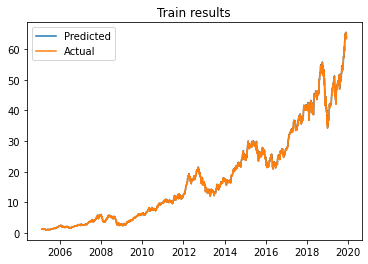

In [27]:
predict_train = model.predict(X_train).flatten()

plt.plot(train_date, predict_train)
plt.plot(train_date, y_train)
plt.legend(["Predicted", "Actual"])
plt.title("Train results")

30/30 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Test results')

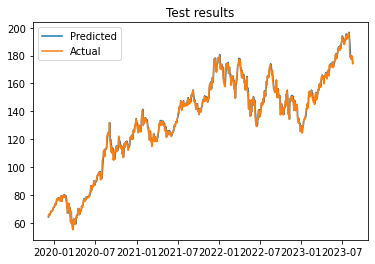

In [28]:
predict_test = model.predict(X_test).flatten()

plt.plot(test_date, predict_test)
plt.plot(test_date, y_test)
plt.legend(["Predicted", "Actual"])
plt.title("Test results")

### LSTM

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((30, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(1)])
model.compile(loss="mse",
              optimizer=Adam(learning_rate=0.01),
              metrics=["mean_absolute_error"])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
117/117 [==============================] - 3s 9ms/step - loss: 33.2933 - mean_absolute_error: 1.8440
Epoch 2/50
117/117 [==============================] - 1s 9ms/step - loss: 0.6245 - mean_absolute_error: 0.5235
Epoch 3/50
117/117 [==============================] - 1s 9ms/step - loss: 0.5234 - mean_absolute_error: 0.4785
Epoch 4/50
117/117 [==============================] - 1s 9ms/step - loss: 2.3907 - mean_absolute_error: 0.9558
Epoch 5/50
117/117 [==============================] - 1s 9ms/step - loss: 0.2847 - mean_absolute_error: 0.3499
Epoch 6/50
117/117 [==============================] - 1s 9ms/step - loss: 0.2984 - mean_absolute_error: 0.3532
Epoch 7/50
117/117 [==============================] - 1s 9ms/step - loss: 0.2601 - mean_absolute_error: 0.3390
Epoch 8/50
117/117 [==============================] - 1s 9ms/step - loss: 0.4819 - mean_absolute_error: 0.4585
Epoch 9/50
117/117 [==============================] - 1s 9ms/step - loss: 0.4998 - mean_absolute_error: 0.4773


117/117 [==============================] - 1s 4ms/step


Text(0.5, 1.0, 'Train results')

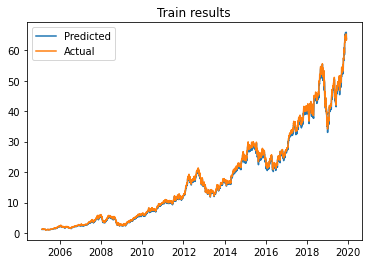

In [30]:
predict_train = model.predict(X_train).flatten()

plt.plot(train_date, predict_train)
plt.plot(train_date, y_train)
plt.legend(["Predicted", "Actual"])
plt.title("Train results")

30/30 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'Test results')

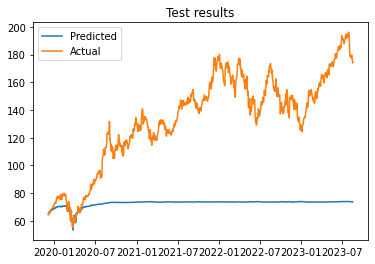

In [31]:
predict_test = model.predict(X_test).flatten()

plt.plot(test_date, predict_test)
plt.plot(test_date, y_test)
plt.legend(["Predicted", "Actual"])
plt.title("Test results")

### GRU

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((30, 1)),
                    layers.GRU(64),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(1)])
model.compile(loss="mse",
              optimizer=Adam(learning_rate=0.001),
              metrics=["mean_absolute_error"])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
117/117 [==============================] - 3s 9ms/step - loss: 206.7612 - mean_absolute_error: 7.9494
Epoch 2/50
117/117 [==============================] - 1s 9ms/step - loss: 1.6138 - mean_absolute_error: 0.4300
Epoch 3/50
117/117 [==============================] - 1s 9ms/step - loss: 0.4602 - mean_absolute_error: 0.3201
Epoch 4/50
117/117 [==============================] - 1s 9ms/step - loss: 0.2644 - mean_absolute_error: 0.3012
Epoch 5/50
117/117 [==============================] - 1s 9ms/step - loss: 0.2045 - mean_absolute_error: 0.2779
Epoch 6/50
117/117 [==============================] - 1s 9ms/step - loss: 0.1886 - mean_absolute_error: 0.2722
Epoch 7/50
117/117 [==============================] - 1s 9ms/step - loss: 0.1851 - mean_absolute_error: 0.2661
Epoch 8/50
117/117 [==============================] - 1s 9ms/step - loss: 0.1982 - mean_absolute_error: 0.2856
Epoch 9/50
117/117 [==============================] - 1s 9ms/step - loss: 0.1987 - mean_absolute_error: 0.2803

117/117 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'Train results')

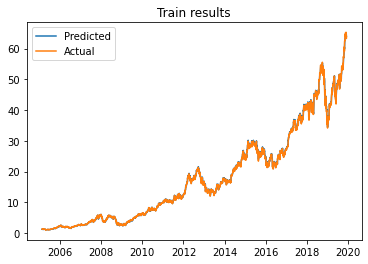

In [33]:
predict_train = model.predict(X_train).flatten()

plt.plot(train_date, predict_train)
plt.plot(train_date, y_train)
plt.legend(["Predicted", "Actual"])
plt.title("Train results")

30/30 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Test results')

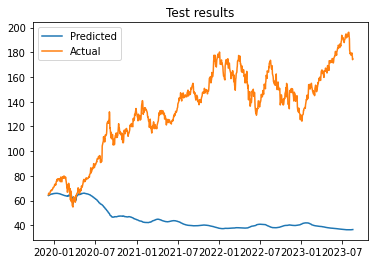

In [34]:
predict_test = model.predict(X_test).flatten()

plt.plot(test_date, predict_test)
plt.plot(test_date, y_test)
plt.legend(["Predicted", "Actual"])
plt.title("Test results")

## Strategies